# KDD Data survey


In [1]:
import pandas as pd
import numpy as np
from src import functions as func
import itertools
import datetime
from sklearn.preprocessing import scale
# from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file_suffix = '.csv'
path = '../dataSets/training/'  # set the data directory
in_file = 'volume(table 6)_training'

In [3]:
volumes = func.read_file_to_volumes(path, in_file, file_suffix)


In [4]:
weathers = func.read_weather(path, 'weather (table 7)_training', file_suffix)


In [5]:
def squeeze(lst,times):
    ans = [[v] * times for v in lst]
    ans = [j for i in ans for j in i]
    return ans


def get_volumes(volumes,day):
    time_windows = list(volumes.keys())
    time_windows.sort()
    tol = [[],[],[]]
    for time_window in time_windows:
        if day == str(time_window.date()):
            for i in range(3):
                if str(i+1) in volumes[time_window]:
                    s = sum(volumes[time_window][str(i+1)].values())
                else:
                    s = 0
                tol[i].append(s)
    for i in range(3):
        tol[i] = squeeze(tol[i],20)
    return tol
    
    

def get_values(weathers,day):
    sorted_keys = sorted(list(weathers.keys()))
    pressures = []
    sea_pressures = []
    wind_directions = []
    wind_speeds = []
    temperatures = []
    rel_humidities = []
    precipitations = []
    for key in sorted_keys:
        if day == str(key.date()):
            pressures.append(weathers[key][0])
            sea_pressures.append(weathers[key][1])
            wind_directions.append(weathers[key][2])
            wind_speeds.append(weathers[key][3])
            temperatures.append(weathers[key][4])
            rel_humidities.append(weathers[key][5])
            precipitations.append(weathers[key][6])
    times = 180
    pressures = squeeze(pressures,times)
    sea_pressures = squeeze(sea_pressures,times)
    wind_directions = squeeze(wind_directions,times)
    wind_speeds = squeeze(wind_speeds,times)
    temperatures = squeeze(temperatures,times)
    rel_humidities = squeeze(rel_humidities,times)
    precipitations = squeeze(precipitations,times)

    values = [pressures, sea_pressures, wind_directions, wind_speeds, temperatures, rel_humidities, precipitations]

    return values

#get infos of that day
def get_matrix(volumes, weathers,day):
    value = []
    tol_vols = []
    
    #given a specific day, generate weather data
    if len(weathers) > 0:
        value = get_values(weathers,day)
    
    #given a specific day, generate volume data of all tol
    if len(volumes) >0 :
        tol_vols = get_volumes(volumes,day)
    
    return tol_vols,value


        



# Observation on total traffic flow

Notes:
    1. Here we ignore the direction temporary
    2. Tollgate 1 & 3 have obvious pattern, while Tol 2 has 2 different cases
    3. Only few extreme instance, perhaps related to vocation/activity/etc.

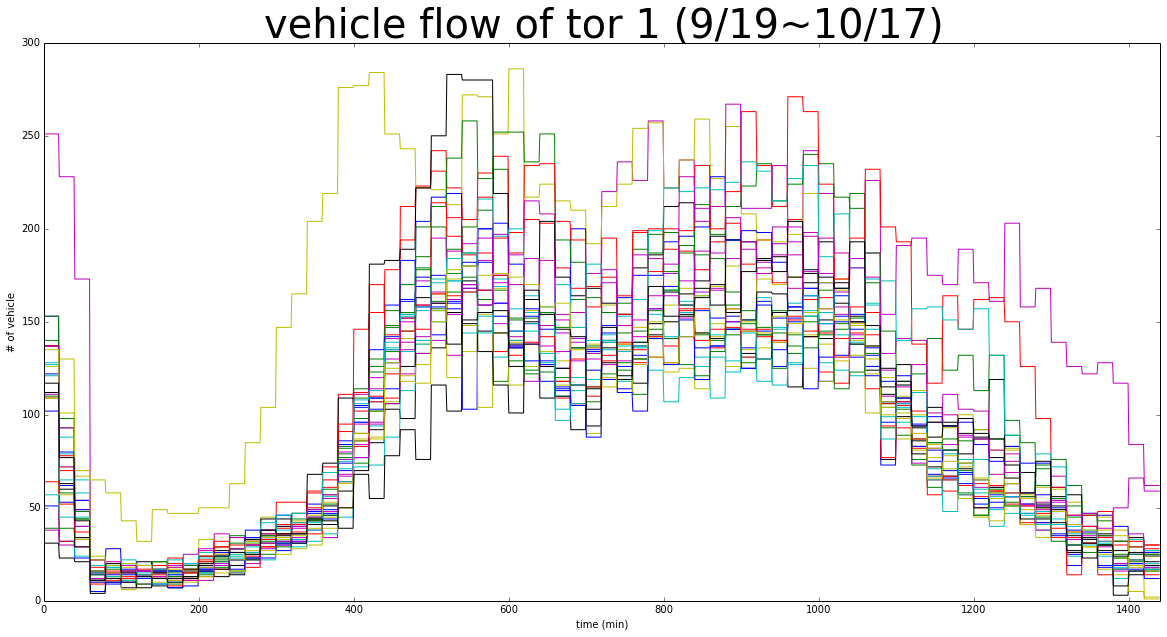

In [6]:
plt.figure(figsize=(20,10))
y_axis = range(1440)
plt.title('vehicle flow of tollgate 1 (9/19~10/17)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')
axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")
while(str(day.date()) != '2016-10-17'):
    tol_vols,_ = get_matrix(volumes, [],str(day.date()))
    plt.plot(y_axis,tol_vols[0])
    #next date
    day = datetime.timedelta(days=1) + day
    



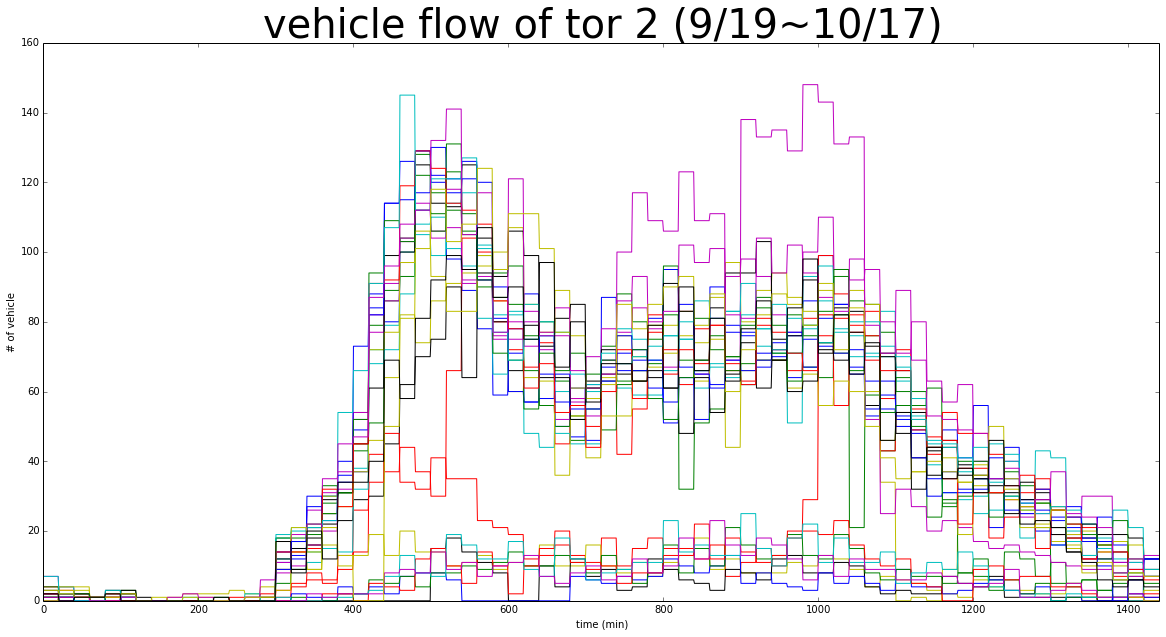

In [7]:
plt.figure(figsize=(20,10))
y_axis = range(1440)
plt.title('vehicle flow of tollgate 2 (9/19~10/17)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')
axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")
while(str(day.date()) != '2016-10-17'):
    tol_vols,_ = get_matrix(volumes, [],str(day.date()))
    plt.plot(y_axis,tol_vols[1])
    #next date
    day = datetime.timedelta(days=1) + day

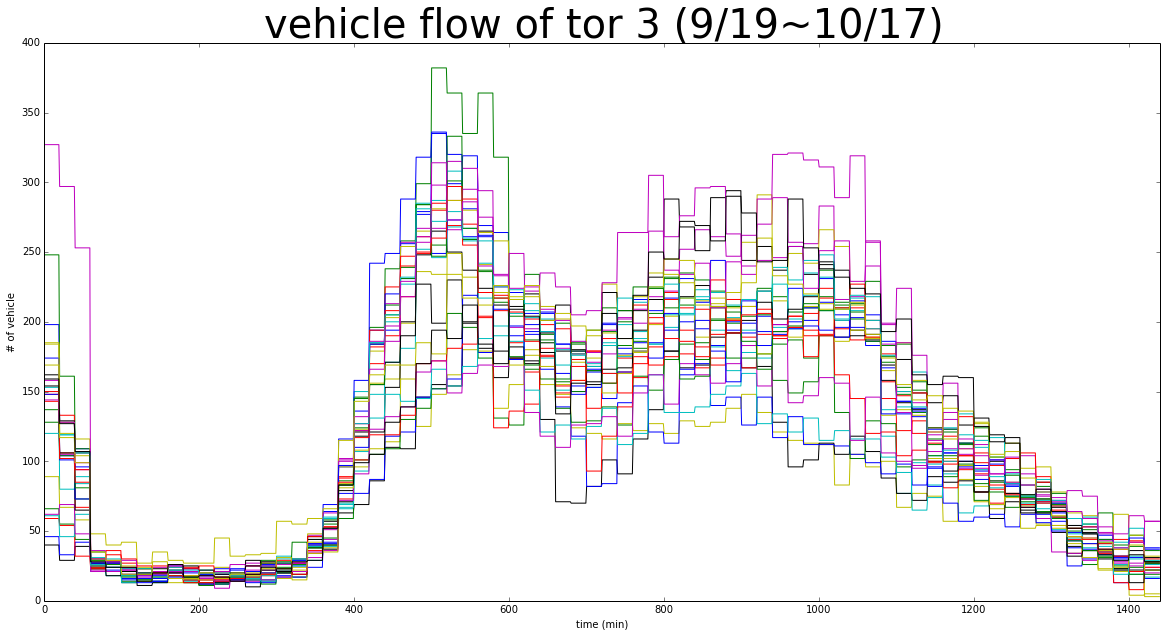

In [42]:
plt.figure(figsize=(20,10))
y_axis = range(1440)
plt.title('vehicle flow of tollgate 3 (9/19~10/17)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')
axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")
while(str(day.date()) != '2016-10-17'):
    tol_vols,_ = get_matrix(volumes, [],str(day.date()))
    plt.plot(y_axis,tol_vols[2])
    #next date
    day = datetime.timedelta(days=1) + day

# Observation on weather

Notes:
    1. Here we scale all information to display them properly
    2. There are some missing features here

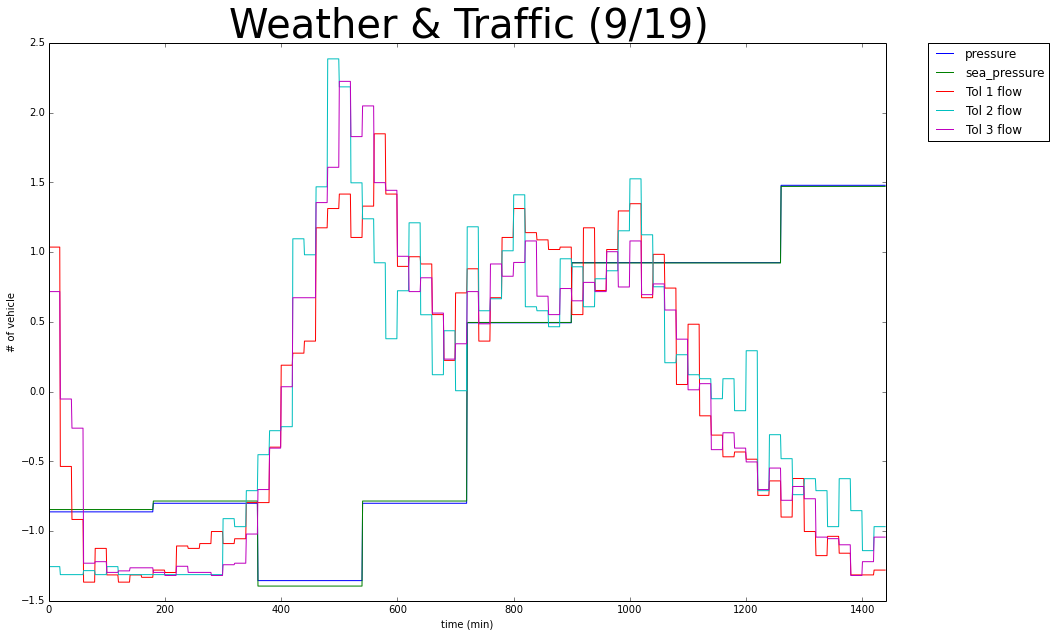

In [59]:
plt.figure(figsize=(15,10))
y_axis = range(1440)
plt.title('Weather & Traffic (9/19)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')

axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")

while(str(day.date()) != '2016-09-20'):
    tol_vols,w = get_matrix(volumes, weathers,str(day.date()))
    w[0] = scale(w[0])
    plt.plot(y_axis,w[0],label="pressure")
    w[1] = scale(w[1])
    plt.plot(y_axis,w[1],label="sea_pressure")
    tol_vols[0] = scale(tol_vols[0])
    plt.plot(y_axis,tol_vols[0],label='Tol 1 flow')
    tol_vols[1] = scale(tol_vols[1])
    plt.plot(y_axis,tol_vols[1],label='Tol 2 flow')
    tol_vols[2] = scale(tol_vols[2])
    plt.plot(y_axis,tol_vols[2],label='Tol 3 flow')
    #next date
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    day = datetime.timedelta(days=1) + day

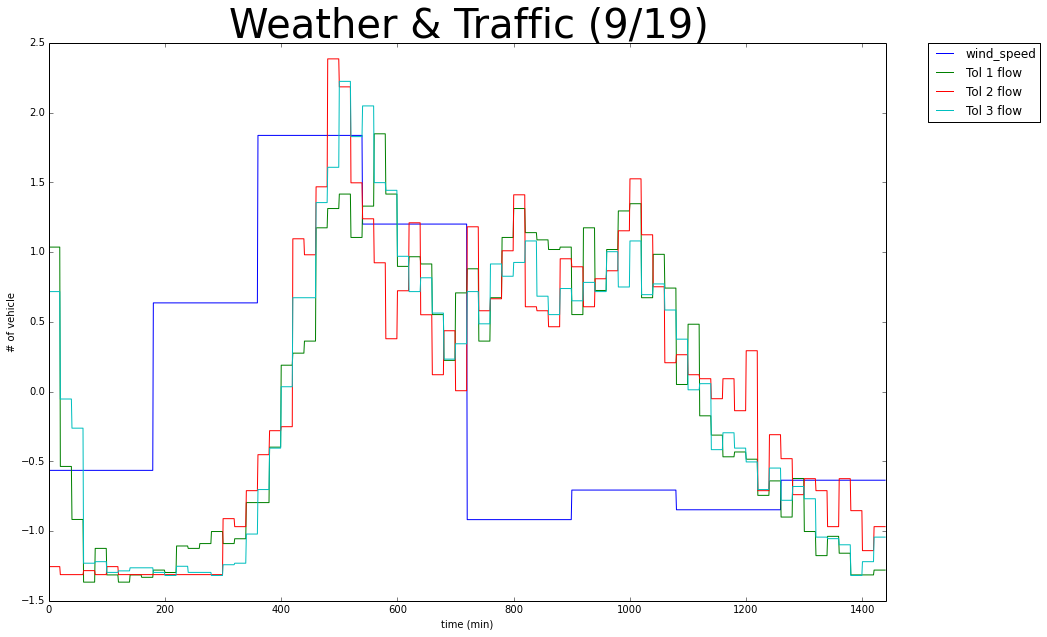

In [60]:
plt.figure(figsize=(15,10))
y_axis = range(1440)
plt.title('Weather & Traffic (9/19)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')

axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")
while(str(day.date()) != '2016-09-20'):
    tol_vols,w = get_matrix(volumes, weathers,str(day.date()))
    #w[2] = scale(w[2])
    #plt.plot(y_axis,w[2],label="wind_direction")
    w[3] = scale(w[3])
    plt.plot(y_axis,w[3],label="wind_speed")
    tol_vols[0] = scale(tol_vols[0])
    plt.plot(y_axis,tol_vols[0],label='Tol 1 flow')
    tol_vols[1] = scale(tol_vols[1])
    plt.plot(y_axis,tol_vols[1],label='Tol 2 flow')
    tol_vols[2] = scale(tol_vols[2])
    plt.plot(y_axis,tol_vols[2],label='Tol 3 flow')
    #next date
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    day = datetime.timedelta(days=1) + day

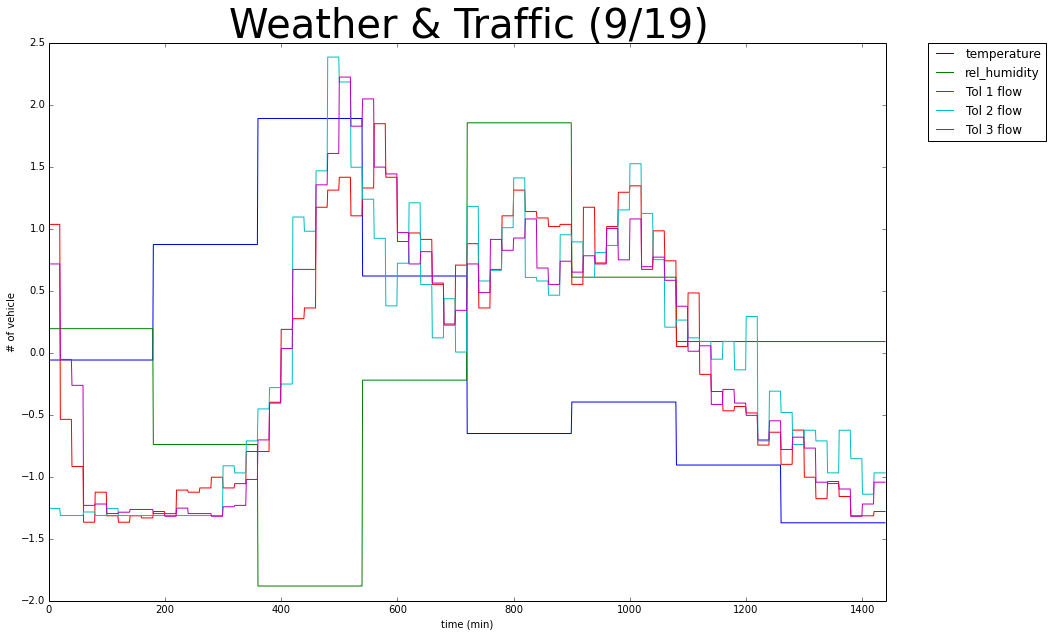

In [61]:
plt.figure(figsize=(15,10))
y_axis = range(1440)
plt.title('Weather & Traffic (9/19)',fontsize=40)
plt.ylabel('# of vehicle')
plt.xlabel('time (min)')

axes = plt.gca()
axes.set_xlim([0,1440])

day = '2016-9-19'
day = datetime.datetime.strptime(day, "%Y-%m-%d")
while(str(day.date()) != '2016-09-20'):
    tol_vols,w = get_matrix(volumes, weathers,str(day.date()))
    w[4] = scale(w[4])
    plt.plot(y_axis,w[4],label="temperature")
    w[5] = scale(w[5])
    plt.plot(y_axis,w[5],label="rel_humidity")
    tol_vols[0] = scale(tol_vols[0])
    plt.plot(y_axis,tol_vols[0],label='Tol 1 flow')
    tol_vols[1] = scale(tol_vols[1])
    plt.plot(y_axis,tol_vols[1],label='Tol 2 flow')
    tol_vols[2] = scale(tol_vols[2])
    plt.plot(y_axis,tol_vols[2],label='Tol 3 flow')
    #next date
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    day = datetime.timedelta(days=1) + day

# Conclusion

1. Weather may be the less important information....
2. Trying to find  out the pattern lying under tollgate 2 maybe useful
3. Maybe useful to model DAY.